In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

In [6]:
from Model import *
from SQLAConnection import SQLAConnection 
from QueryGenerator import QueryGenerator
from Data import Data
import Settings 

In [7]:
settings = Settings.Settings()
model = TimeSeriesPredictionNeuralNet(settings)
connection = SQLAConnection()
query_generator = QueryGenerator(
    settings.sensors,
    settings.start_date,
    settings.end_date
    )
data = Data(query_generator,connection)

In [40]:
data.load_dfs(date='2020-11-01')
df = data.dfs[0]
print(len(df))

46275


In [99]:
n_samples = 200
n_timestamps = int(len(df)/n_samples)
#n_samples, n_timestamps = 15425, 3
X = data.dfs[0]['acc1_ch_y'].iloc[:n_samples*n_timestamps].to_numpy().reshape(n_samples,n_timestamps)
print(X)

[[ 0.05892419  0.79978978 -0.8379131  ... -1.87122564  0.35137113
  -0.38949446]
 [-0.54546616  1.69662707 -0.23352275 ... -1.13036005 -1.87122564
   0.21489589]
 [ 1.24820842  1.98907401  0.50734283 ... -0.6819414  -0.54546616
  -0.8379131 ]
 ...
 [ 1.40418013  0.64381807  0.05892419 ...  0.05892419  0.64381807
  -1.57877869]
 [ 2.28152096 -0.54546616  0.95576148 ...  0.21489589  0.64381807
  -0.38949446]
 [ 1.69662707  0.95576148  0.64381807 ...  0.21489589  2.8859113
  -1.44230345]]


In [100]:
n_groups = 3
window_size = 45
window_size = min(window_size,n_timestamps)
max_range = int((window_size-1)/n_groups)
groups = [np.arange(i, i + max_range) for i in range(0, max_range*n_groups, max_range)]
groups

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])]

In [101]:
ssa = SingularSpectrumAnalysis(window_size=window_size, groups=groups)
X_ssa = ssa.fit_transform(X)

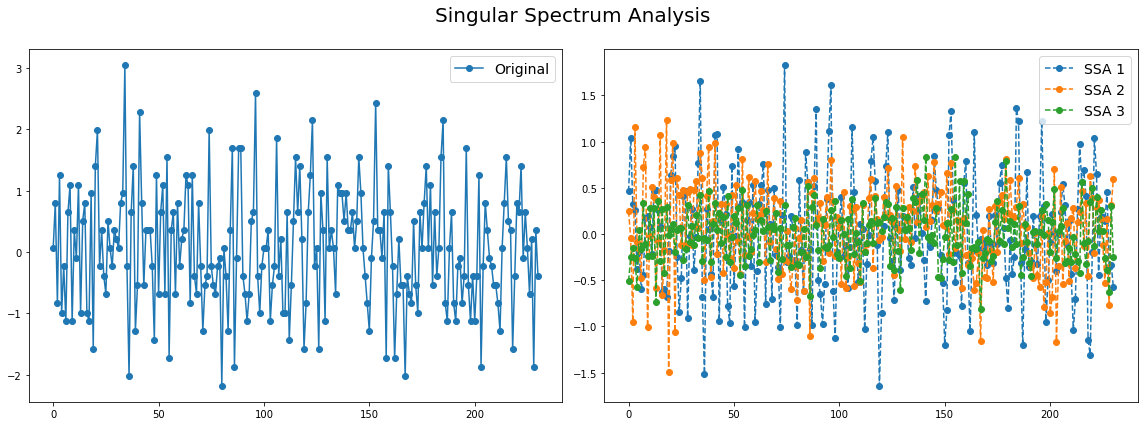

In [102]:
# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

In [14]:
np.shape(X_ssa)

(100, 3, 48)